In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!ls 'drive/My Drive/Women in Data science'
#/content/drive/My Drive/Colab Notebooks/

Classification_model_for_printscreen.ipynb  kaggle_survey_2022_responses.csv
Classification_model.ipynb		    MAIN.ipynb
hypothesis_testing.ipynb		    statistical_tests.py
kaggle_survey_2022_answer_choices.pdf


In [4]:
df = pd.read_csv("drive/My Drive/Women in Data science/kaggle_survey_2022_responses.csv")

<ipython-input-4-831acd195352>:1: DtypeWarning: Columns (0,208,225,255,257,260,270,271,277) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("drive/My Drive/Women in Data science/kaggle_survey_2022_responses.csv")


In [5]:
df.head()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,462,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,293,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
4,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


In [6]:
#arrange the csv
#chosing the columns I need:
df_new=df.loc[:,['Q2','Q3','Q4','Q5','Q8','Q9','Q11','Q16', 'Q23', 'Q24', 'Q25', 'Q26','Q29']]
#deleting the questios row:
df_new.drop(axis=0, index=0, inplace=True)
#setting the column names:
df_new.columns = ['age', 'gender', 'country', 'student','level_on2Y','published_reaerch','experience_programming','experience_ML','title','industry','size_company','size_DS_company','salary']
df_new.describe()

,age,gender,country,student,level_on2Y,published_reaerch,experience_programming,experience_ML,title,industry,size_company,size_DS_company,salary
count,23997,23997,23997,23997,23398,12361,23243,19886,10630,9094,9066,8990,8136
unique,11,5,58,2,7,2,7,9,15,15,5,7,26
top,18-21,Man,India,No,Master’s degree,No,1-3 years,Under 1 year,Data Scientist,Computers/Technology,0-49 employees,20+,$0-999
freq,4559,18266,8792,12036,9142,7117,6459,7221,1929,2321,2130,2270,1112


gender
Man                        18266
Nonbinary                     78
Prefer not to say            334
Prefer to self-describe       33
Woman                       5286
dtype: int64


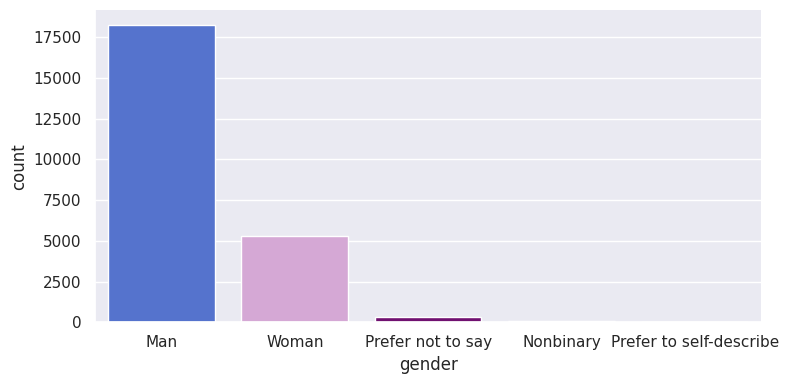

In [7]:
print(df_new.groupby('gender').size())
sns.set(font_scale=1)
sns.catplot(x='gender', kind='count', data = df_new,aspect=4/2,height =4, palette = sns.color_palette(['royalblue', 'plum','purple','deeppink','red']))

#The man are the biggest group. (#men*3.5 =#women)
#23997

In [8]:
#we want to do comaprison. we built 2 diffrents datasets
df_woman = df_new[df_new['gender'] == 'Woman']
df_man = df_new[df_new['gender'] == 'Man']
#dataframe of man and woman
df_MW = df_woman.append(df_man)
df_MW

<ipython-input-8-c34e0d97304a>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_MW = df_woman.append(df_man)


,age,gender,country,student,level_on2Y,published_reaerch,experience_programming,experience_ML,title,industry,size_company,size_DS_company,salary
6,18-21,Woman,India,Yes,Master’s degree,No,1-3 years,1-2 years,NaN,NaN,NaN,NaN,NaN
22,25-29,Woman,China,Yes,Master’s degree,No,< 1 years,NaN,NaN,NaN,NaN,NaN,NaN
23,35-39,Woman,India,No,Master’s degree,Yes,3-5 years,I do not use machine learning methods,NaN,NaN,NaN,NaN,NaN
28,60-69,Woman,Argentina,No,Master’s degree,Yes,1-3 years,Under 1 year,Other,Medical/Pharmaceutical,0-49 employees,1-2,"3,000-3,999"
41,22-24,Woman,Canada,No,Master’s degree,No,5-10 years,1-2 years,Machine Learning/ MLops Engineer,Computers/Technology,"1000-9,999 employees",1-2,"5,000-7,499"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,22-24,Man,India,Yes,Bachelor’s degree,NaN,< 1 years,I do not use machine learning methods,NaN,NaN,NaN,NaN,NaN
23993,22-24,Man,United States of America,Yes,Master’s degree,No,3-5 years,1-2 years,NaN,NaN,NaN,NaN,NaN
23994,60-69,Man,United States of America,Yes,Bachelor’s degree,NaN,20+ years,2-3 years,NaN,NaN,NaN,NaN,NaN
23995,25-29,Man,Turkey,No,Master’s degree,Yes,< 1 years,Under 1 year,Engineer (non-software),Energy/Mining,"10,000 or more employees",0,"25,000-29,999"


#Age

   gender    age  percentage
0     Man  25-29   18.750684
1     Man  18-21   18.121099
2     Man  22-24   17.343699
3     Man  30-34   12.307019
4     Man  35-39    9.805102
5     Man  40-44    8.102485
6     Man  45-49    5.458228
7     Man  50-54    4.155261
8     Man  55-59    2.770174
9     Man  60-69    2.573087
10    Man    70+    0.613161
11  Woman  18-21   21.944760
12  Woman  22-24   19.750284
13  Woman  25-29   18.369277
14  Woman  30-34   12.542565
15  Woman  35-39    9.818388
16  Woman  40-44    7.756337
17  Woman  45-49    4.521377
18  Woman  50-54    2.648505
19  Woman  55-59    1.683693
20  Woman  60-69    0.794552
21  Woman    70+    0.170261


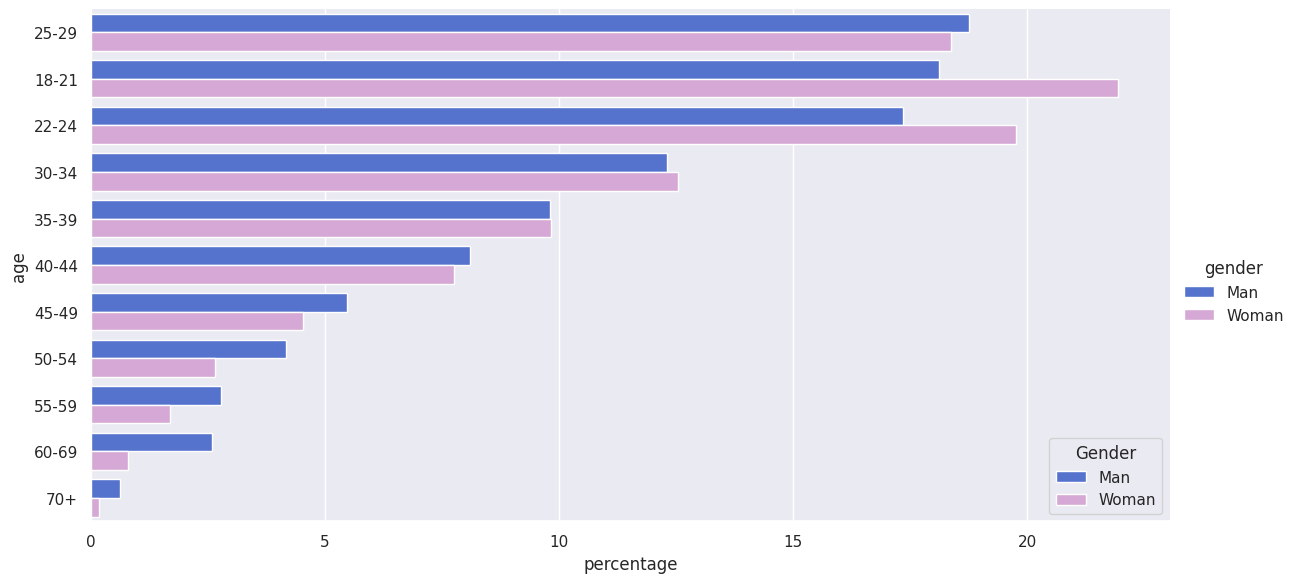

In [9]:
h1 = df_MW.groupby('gender')['age'].value_counts(normalize=True).mul(100)
h1 = h1.rename('percentage').reset_index()
print(h1)
sns.set(font_scale=1)
sns.catplot(x='percentage',y='age',kind='bar', data=h1,height=6, aspect=4/2,hue='gender', palette = sns.color_palette(['royalblue', 'plum']))
plt.legend(loc='lower right',title='Gender')

In [ ]:
#Age of man in data science
# h1 = df_man['age'].value_counts(normalize=True)*100
# h1=h1.reset_index()
# print(h1)
# sns.catplot(x='index',y='age',kind='bar', data=h1,height=6, aspect=4/2, palette = 'Set2')
#the number of man in data science decreases when growing up

#Country

<ipython-input-10-320b49abbd63>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  h4 = h2.append(h3)


   gender                   country  percentage
0     Man                     India   35.519545
1     Man  United States of America   11.206613
2     Man                     Other    6.169933
3     Man                    Brazil    3.865105
4     Man                   Nigeria    3.000109
5     Man                  Pakistan    2.803022
6     Man                     Japan    2.759225
7     Man                     China    1.948976
8     Man                    Mexico    1.729990
9     Man                     Egypt    1.604073
58  Woman                     India   41.222096
59  Woman  United States of America   14.623534
60  Woman                     Other    5.202421
61  Woman                   Nigeria    3.348468
62  Woman                    Brazil    2.232312
63  Woman                  Pakistan    1.948543
64  Woman                 Indonesia    1.929625
65  Woman                     Egypt    1.683693
66  Woman                    Turkey    1.532350
67  Woman                     China    1

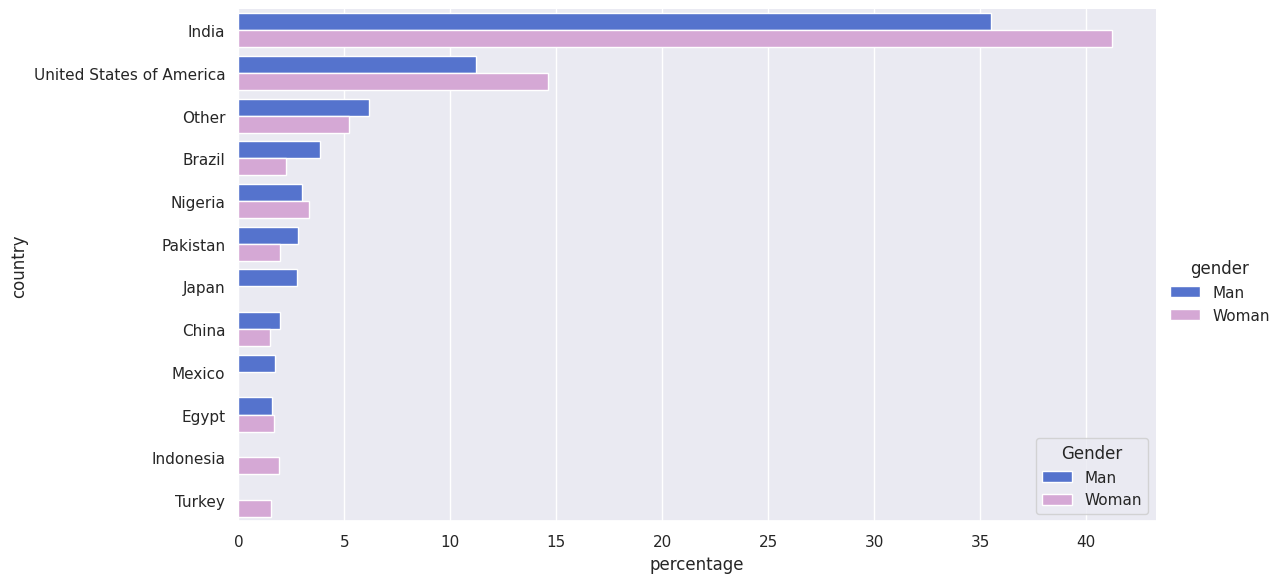

In [10]:
h1 = df_MW.groupby('gender')['country'].value_counts(normalize=True).mul(100)
h1 = h1.rename('percentage').reset_index() #choose top 10
h2 = h1.iloc[:10]
h3 = h1.iloc[58:68]
h4 = h2.append(h3)
print(h4)
sns.set(font_scale=1)
sns.catplot(x='percentage',y='country',kind='bar', data=h4,height=6, aspect=4/2,hue='gender', palette = sns.color_palette(['royalblue', 'plum']))
plt.legend(loc='lower right',title='Gender')

In [ ]:
#country of women in data science
# h1 = df_woman['country'].value_counts(normalize=True)*100
# h1=h1.reset_index().iloc[:11].drop([2]) #choose top 10
# print(h1)
# sns.catplot(x='index',y='country',kind='bar', data=h1,height=10, aspect=4/2, palette = 'Set2')
#India and UA leading.(Israel is in the 38th place)

In [ ]:
#country of man in data science
# h1 = df_man['country'].value_counts(normalize=True)*100
# h1=h1.reset_index().iloc[:11].drop([2]) #choose top 10
# print(h1)
# sns.catplot(x='index',y='country',kind='bar', data=h1,height=10, aspect=4/2, palette = 'Set2')
#India and UA leading.(Israel is in the 36th place)

#Experience

   gender     experience_programming  percentage
0     Man                  1-3 years   27.813223
1     Man                  < 1 years   22.087968
2     Man                  3-5 years   15.024561
3     Man                 5-10 years   11.552143
4     Man                10-20 years    8.390266
5     Man                  20+ years    7.797414
6     Man  I have never written code    7.334425
7   Woman                  < 1 years   28.473447
8   Woman                  1-3 years   28.218695
9   Woman  I have never written code   13.834999
10  Woman                  3-5 years   13.090339
11  Woman                 5-10 years    8.818342
12  Woman                10-20 years    5.291005
13  Woman                  20+ years    2.273173


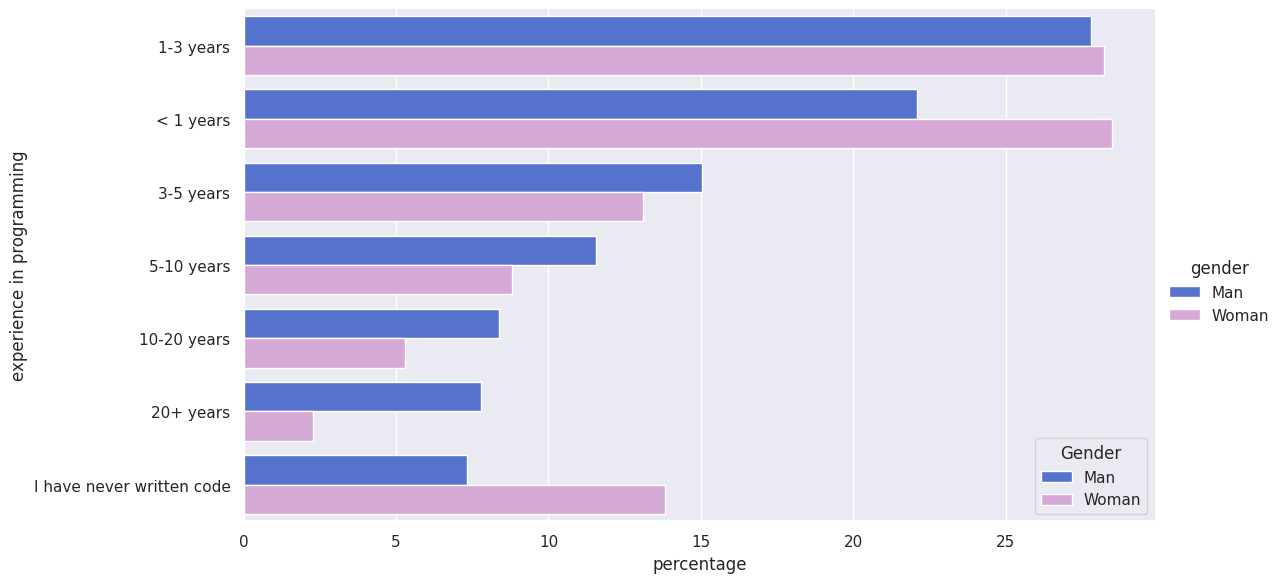

In [79]:
h1 = df_MW.groupby('gender')['experience_programming'].value_counts(normalize=True).mul(100)
h1 = h1.rename('percentage').reset_index()
print(h1)
sns.set(font_scale=1)
sns.catplot(x='percentage',y='experience_programming',kind='bar', data=h1,height=6, aspect=4/2,hue='gender', palette = sns.color_palette(['royalblue', 'plum']))
plt.ylabel('experience in programming')
plt.legend(loc='lower right',title='Gender')

   gender                          experience_ML  percentage
0     Man                           Under 1 year   35.318846
1     Man                              1-2 years   19.046695
2     Man  I do not use machine learning methods   15.890570
3     Man                              2-3 years   10.225068
4     Man                             5-10 years    5.988876
5     Man                              3-4 years    5.704307
6     Man                              4-5 years    5.161040
7     Man                            10-20 years    2.651662
8     Man                       20 or more years    0.012935
9   Woman                           Under 1 year   40.329724
10  Woman  I do not use machine learning methods   22.219488
11  Woman                              1-2 years   17.568898
12  Woman                              2-3 years    8.341535
13  Woman                              3-4 years    3.617126
14  Woman                             5-10 years    3.297244
15  Woman               

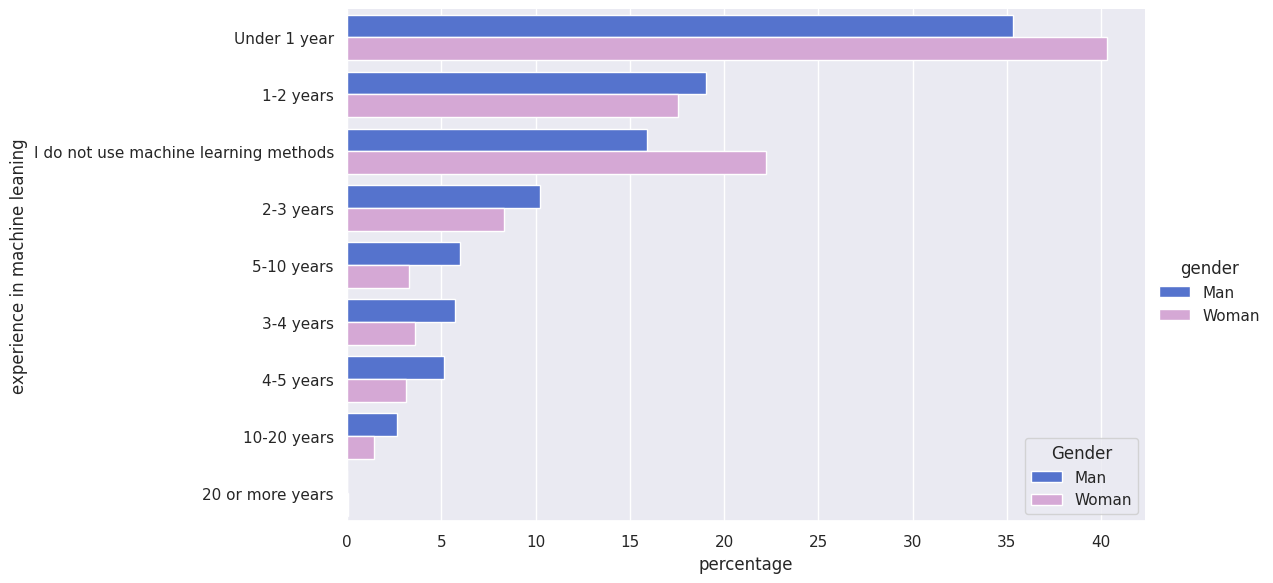

In [80]:
h2 = df_MW.groupby('gender')['experience_ML'].value_counts(normalize=True).mul(100)
h2 = h2.rename('percentage').reset_index()
print(h2)
sns.set(font_scale=1)
sns.catplot(x='percentage',y='experience_ML',kind='bar', data=h2,height=6, aspect=4/2,hue='gender', palette = sns.color_palette(['royalblue', 'plum']))
plt.ylabel('experience in machine leaning')
plt.legend(loc='lower right',title='Gender')

In [81]:
h1['experience_programming'] = h1['experience_programming'].replace({'I have never written code':'Nothing',
                                  })

# print(h1)

h2['experience_ML'] = h2['experience_ML'].replace({'Under 1 year':'< 1 years',
                                                   'I do not use machine learning methods':'nothing',
                                                   '20 or more years':'20+ years'})
# h2
h2.loc[1]+=h2.loc[3]
h2.loc[5]+=h2.loc[6]
h2.loc[11]+=h2.loc[12]
h2.loc[13]+=h2.loc[15]
h2_new = h2.drop([3,6,12,15])
h2_new['experience_ML'] = h2_new['experience_ML'].replace({'1-2 years2-3 years':'1-3 years',
                                                   '3-4 years4-5 years':'3-5 years'})
h2_new['gender'] = h2_new['gender'].replace({'ManMan':'Man','WomanWoman':'Woman'})

# h3=pd.merge(h1,h2,how='right')
# h3
h2_new

,gender,experience_ML,percentage
0,Man,< 1 years,35.318846
1,Man,1-3 years,29.271763
2,Man,nothing,15.890570
4,Man,5-10 years,5.988876
5,Man,3-5 years,10.865347
7,Man,10-20 years,2.651662
8,Man,20+ years,0.012935
9,Woman,< 1 years,40.329724
10,Woman,nothing,22.219488
11,Woman,1-3 years,25.910433


   gender          exp  percentage1  percentage2  percentage
0     Man    1-3 years    27.813223    29.271763   57.084986
1     Man    < 1 years    22.087968    35.318846   57.406814
2     Man    3-5 years    15.024561    10.865347   25.889908
3     Man   5-10 years    11.552143     5.988876   17.541019
4     Man  10-20 years     8.390266     2.651662   11.041928
5     Man    20+ years     7.797414     0.012935    7.810349
6   Woman    < 1 years    28.473447    40.329724   68.803171
7   Woman    1-3 years    28.218695    25.910433   54.129128
8   Woman    3-5 years    13.090339     6.766732   19.857071
9   Woman   5-10 years     8.818342     3.297244   12.115586
10  Woman  10-20 years     5.291005     1.451772    6.742777
11  Woman    20+ years     2.273173     0.024606    2.297779


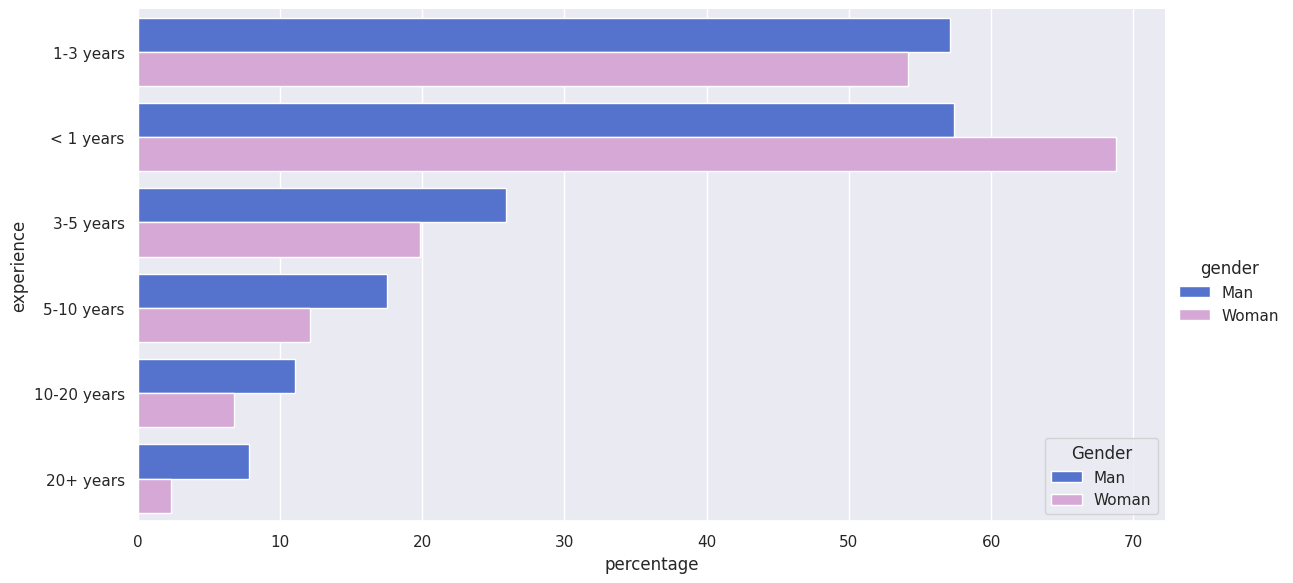

In [83]:
h1 = h1.rename(columns={"experience_programming": "exp",'percentage':'percentage1'})
h2_new = h2_new.rename(columns={"experience_ML": "exp",'percentage':'percentage2'})
h3=pd.merge(h1,h2_new)
h3['percentage'] = h3['percentage1']+h3['percentage2']
print(h3)
sns.set(font_scale=1)
sns.catplot(x='percentage',y='exp',kind='bar', data=h3,height=6, aspect=4/2,hue='gender', palette = sns.color_palette(['royalblue', 'plum']))
plt.ylabel('experience')
plt.legend(loc='lower right',title='Gender')

   gender              level_on2Y  percentage
0     Man         Master’s degree   39.103355
1     Man       Bachelor’s degree   33.077096
2     Man         Doctoral degree   11.182808
3     Man            Some College    6.222646
4     Man               No answer    5.414656
5     Man     No formal education    2.648412
6     Man  Professional doctorate    2.351027
7   Woman         Master’s degree   39.222546
8   Woman       Bachelor’s degree   31.253644
9   Woman         Doctoral degree   12.108844
10  Woman               No answer    7.366375
11  Woman            Some College    5.617104
12  Woman  Professional doctorate    2.876579
13  Woman     No formal education    1.554908


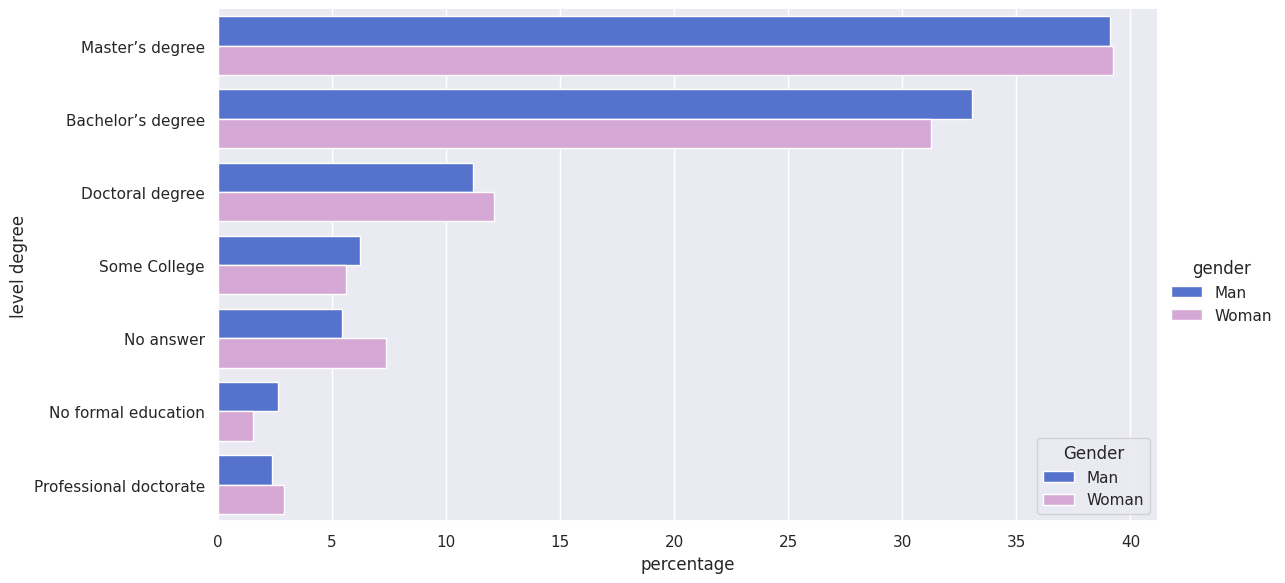

In [25]:
h1 = df_MW.groupby('gender')['level_on2Y'].value_counts(normalize=True).mul(100)
h1 = h1.rename('percentage').reset_index()
h1['level_on2Y'] = h1['level_on2Y'].replace({ 'No formal education past high school': 'No formal education',
                                   'Some college/university study without earning a bachelor’s degree':'Some College',
                                   'I prefer not to answer':'No answer'})
print(h1)
sns.set(font_scale=1)
sns.catplot(x='percentage',y='level_on2Y',kind='bar', data=h1,height=6, aspect=4/2,hue='gender', palette = sns.color_palette(['royalblue', 'plum']))
plt.ylabel('level degree')
plt.legend(loc='lower right',title='Gender')

In [ ]:
#Experience_programming of women in data science
# h1 = df_woman['experience_programming'].value_counts(normalize=True)*100
# h1=h1.reset_index()
# print(h1)
# sns.catplot(x='index',y='experience_programming',kind='bar', data=h1,height=6, aspect=4/2, palette = 'Set2')

In [ ]:
#Experience_ML of women in data science
# h1 = df_woman['experience_ML'].value_counts(normalize=True)*100
# h1=h1.reset_index()
# print(h1)
# sns.catplot(x='index',y='experience_ML',kind='bar', data=h1,height=10, aspect=4/2, palette = 'Set2')

In [ ]:
#Most of the women have little experience in machine learning programming and ML, which makes sense because of their young age.

In [ ]:
# h1 = df_woman['level_on2Y'].value_counts(normalize=True)*100
# h1=h1.reset_index()
# h1['index'] = h1['index'].replace({ 'No formal education past high school': 'No formal education',
#                                    'Some college/university study without earning a bachelor’s degree':'Some College',
#                                    'I prefer not to answer':'No answer'})
# print(h1)
# sns.catplot(x='index',y='level_on2Y',kind='bar', data=h1,height=10, aspect=4/2, palette = 'Set2')
#It seems that the majority went to graduate degrees and did not integrate into work

In [ ]:
#Experience_programming of man in data science
# h1 = df_man['experience_programming'].value_counts(normalize=True)*100
# h1=h1.reset_index()
# print(h1)
# sns.catplot(x='index',y='experience_programming',kind='bar', data=h1,height=6, aspect=4/2, palette = 'Set2')

In [ ]:
#Experience_ML of man in data science
# h1 = df_man['experience_ML'].value_counts(normalize=True)*100
# h1=h1.reset_index()
# print(h1)
# sns.catplot(x='index',y='experience_ML',kind='bar', data=h1,height=10, aspect=4/2, palette = 'Set2')

In [ ]:
# h1 = df_man['level_on2Y'].value_counts(normalize=True)*100
# h1=h1.reset_index()
# h1['index'] = h1['index'].replace({ 'No formal education past high school': 'No formal education',
#                                    'Some college/university study without earning a bachelor’s degree':'Some College',
#                                    'I prefer not to answer':'No answer'})
# print(h1)
# sns.catplot(x='index',y='level_on2Y',kind='bar', data=h1,height=10, aspect=4/2, palette = 'Set2')
#It seems that the majority went to graduate degrees and did not integrate into work

#Title work and comapny information


   gender                    title  percentage
0     Man           Data Scientist   18.900262
1     Man             Data Analyst   14.139491
2     Man             Not employed   11.890026
3     Man        Software Engineer    9.878600
4     Man                  Manager    8.509879
5     Man                    Other    6.772197
6     Man      Teacher / professor    6.641276
7     Man             ML/MLops Eng    5.950964
8     Man       Research Scientist    5.712925
9     Man  Engineer (non-software)    4.855987
10    Man            Data Engineer    3.475363
11    Man             Statistician    1.035468
12    Man           Data Architect    0.975958
13    Man       Data Administrator    0.666508
14    Man       Developer Advocate    0.595096
15  Woman             Not employed   19.411765
16  Woman             Data Analyst   16.372549
17  Woman           Data Scientist   15.098039
18  Woman      Teacher / professor   12.990196
19  Woman                    Other    8.235294
20  Woman    

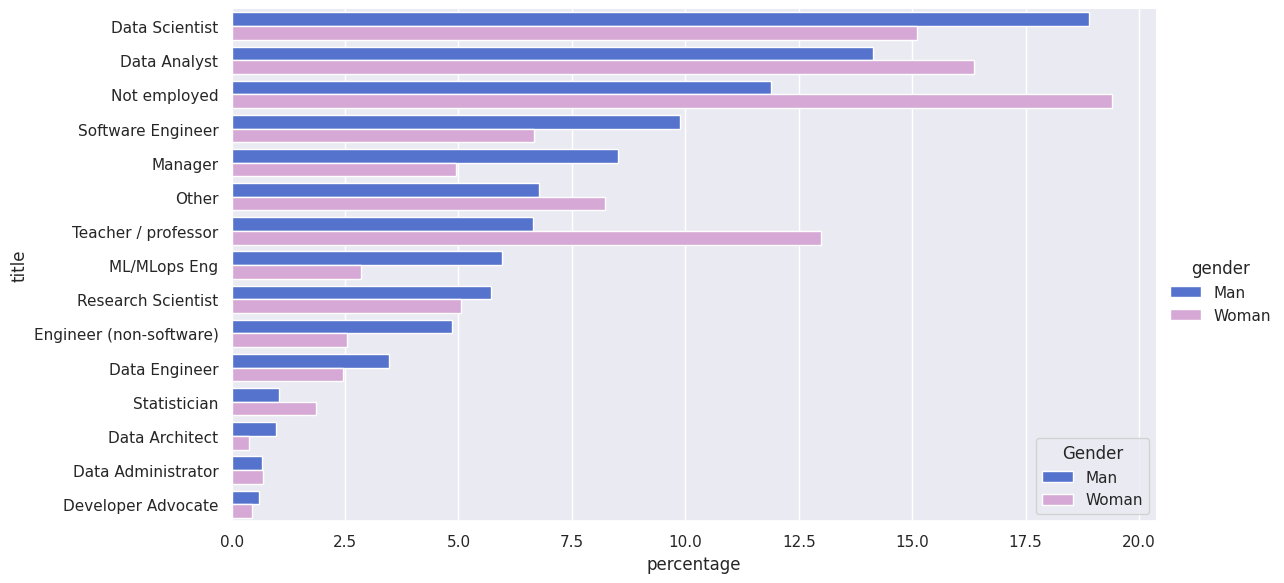

In [26]:
h1 = df_MW.groupby('gender')['title'].value_counts(normalize=True).mul(100)
h1 = h1.rename('percentage').reset_index()
h1['title'] = h1['title'].replace({ 'Currently not employed': 'Not employed','Machine Learning/ MLops Engineer': 'ML/MLops Eng',
                                   'Data Analyst (Business, Marketing, Financial, Quantitative, etc)':'Data Analyst',
                                   'Manager (Program, Project, Operations, Executive-level, etc)':'Manager' })
print(h1)
sns.set(font_scale=1)
sns.catplot(x='percentage',y='title',kind='bar', data=h1,height=6, aspect=4/2,hue='gender', palette = sns.color_palette(['royalblue', 'plum']))
plt.legend(loc='lower right',title='Gender')

<ipython-input-19-fb98967e36f8>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  h4 = h2.append(h3)


   gender                   industry  percentage
0     Man       Computers/Technology   25.838560
1     Man        Academics/Education   14.698664
2     Man         Accounting/Finance    8.917371
3     Man                      Other    8.262885
4     Man  Manufacturing/Fabrication    6.531224
15  Woman       Computers/Technology   24.178549
16  Woman        Academics/Education   21.450713
17  Woman         Accounting/Finance    8.679479
18  Woman                      Other    8.059516
19  Woman     Medical/Pharmaceutical    6.881587


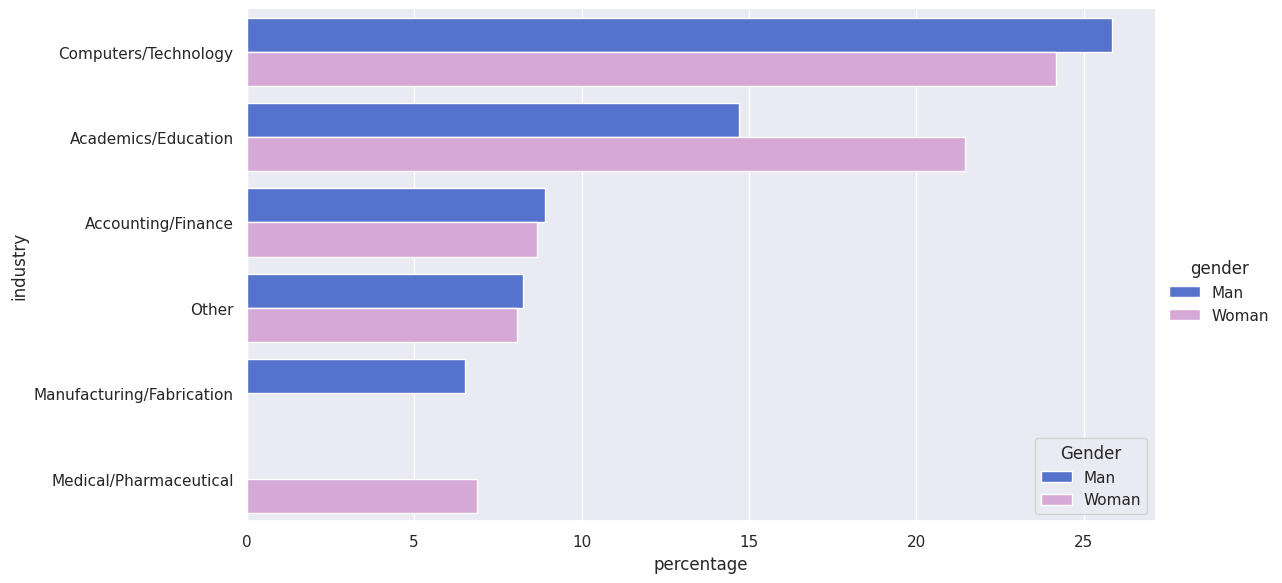

In [19]:
h1 = df_MW.groupby('gender')['industry'].value_counts(normalize=True).mul(100)
h1 = h1.rename('percentage').reset_index() #choose top 5
# print(h1.groupby('gender')['industry'].value_counts(normalize=True))
h2 = h1.iloc[:5]
h3 = h1.iloc[15:20]
h4 = h2.append(h3)
print(h4)
sns.set(font_scale=1)
sns.catplot(x='percentage',y='industry',kind='bar', data=h4,height=6, aspect=4/2,hue='gender', palette = sns.color_palette(['royalblue', 'plum']))
plt.legend(loc='lower right',title='Gender')

  gender              size_company  percentage
0    Man  10,000 or more employees   23.547108
1    Man            0-49 employees   23.533434
2    Man      1000-9,999 employees   21.263503
3    Man          50-249 employees   16.778340
4    Man         250-999 employees   14.877615
5  Woman            0-49 employees   23.038605
6  Woman  10,000 or more employees   22.914072
7  Woman          50-249 employees   19.364882
8  Woman      1000-9,999 employees   18.991283
9  Woman         250-999 employees   15.691158


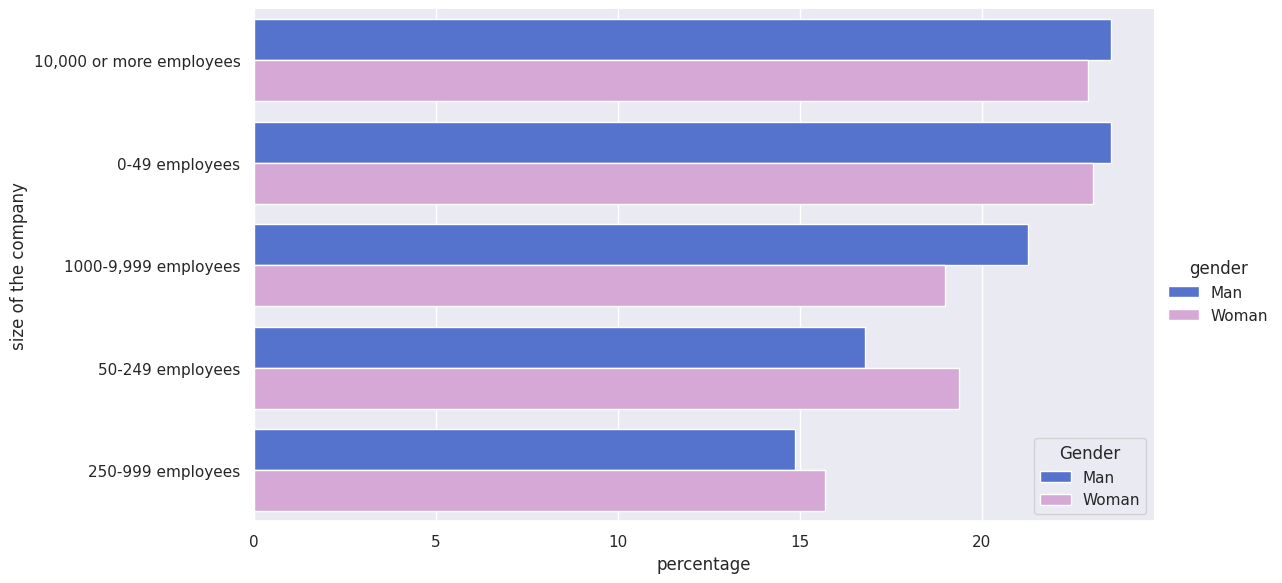

In [27]:
h1 = df_MW.groupby('gender')['size_company'].value_counts(normalize=True).mul(100)
h1 = h1.rename('percentage').reset_index()
print(h1)
sns.set(font_scale=1)
sns.catplot(x='percentage',y='size_company',kind='bar', data=h1,height=6, aspect=4/2,hue='gender', palette = sns.color_palette(['royalblue', 'plum']))
plt.ylabel('size of the company')
plt.legend(loc='lower right',title='Gender')

   gender size_DS_company  percentage
0     Man             20+   25.523416
1     Man             1-2   20.578512
2     Man             3-4   15.592287
3     Man               0   15.426997
4     Man             5-9   12.809917
5     Man           10-14    7.272727
6     Man           15-19    2.796143
7   Woman             20+   23.737374
8   Woman               0   20.012626
9   Woman             1-2   18.244949
10  Woman             3-4   15.277778
11  Woman             5-9   12.184343
12  Woman           10-14    6.881313
13  Woman           15-19    3.661616


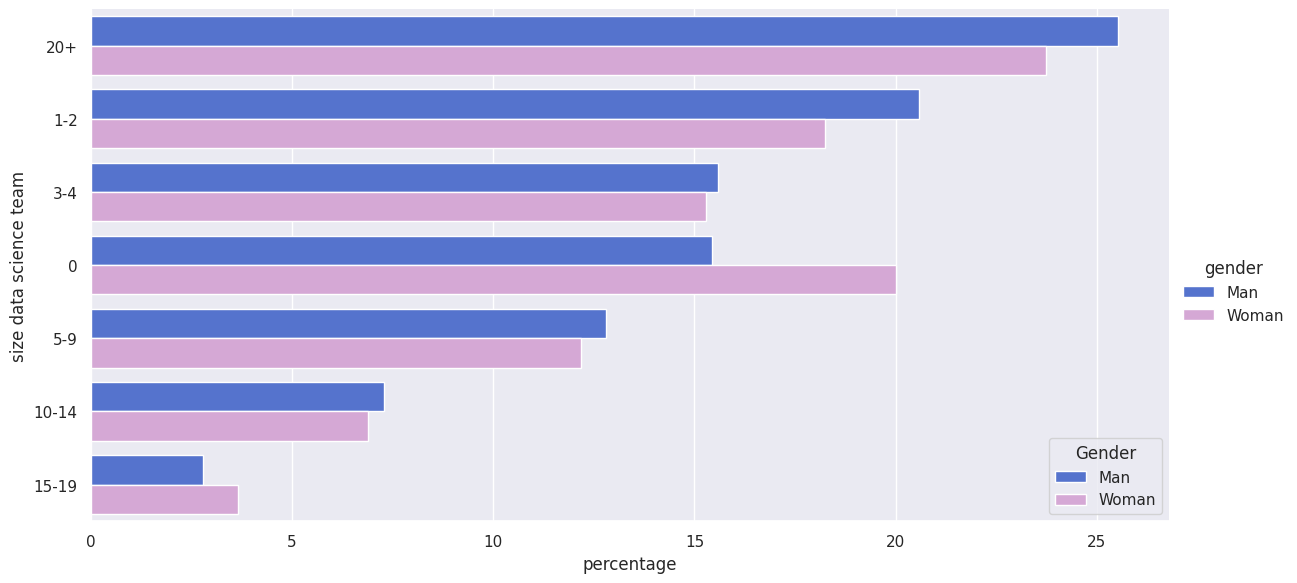

In [28]:
h1 = df_MW.groupby('gender')['size_DS_company'].value_counts(normalize=True).mul(100)
h1 = h1.rename('percentage').reset_index()
print(h1)
sns.set(font_scale=1)
sns.catplot(x='percentage',y='size_DS_company',kind='bar', data=h1,height=6, aspect=4/2,hue='gender', palette = sns.color_palette(['royalblue', 'plum']))
plt.ylabel('size data science team')
plt.legend(loc='lower right',title='Gender')

<ipython-input-29-4e813f5c479b>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  h4 = h2.append(h3)


   gender         salary  percentage
0     Man         $0-999   12.012057
1     Man  30,000-39,999    6.058779
2     Man  10,000-14,999    6.043708
3     Man  40,000-49,999    5.440844
4     Man    1,000-1,999    5.335343
26  Woman         $0-999   21.418234
27  Woman  10,000-14,999    6.222865
28  Woman    1,000-1,999    6.150507
29  Woman    7,500-9,999    4.486252
30  Woman    5,000-7,499    4.413893


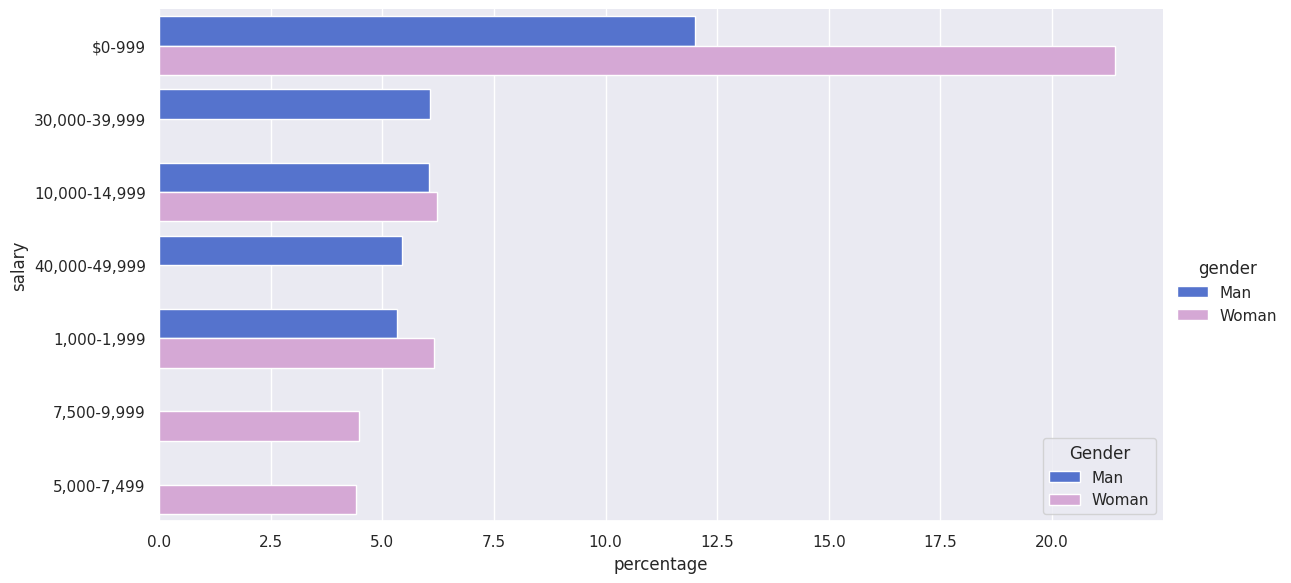

In [29]:
h1 = df_MW.groupby('gender')['salary'].value_counts(normalize=True).mul(100)
h1 = h1.rename('percentage').reset_index() #choose top 5
# print(h1.groupby('gender')['salary'].value_counts(normalize=True))
h2 = h1.iloc[:5]
h3 = h1.iloc[26:31]
h4 = h2.append(h3)
print(h4)
sns.set(font_scale=1)
sns.catplot(x='percentage',y='salary',kind='bar', data=h4,height=6, aspect=4/2,hue='gender', palette = sns.color_palette(['royalblue', 'plum']))
plt.legend(loc='lower right',title='Gender')

In [ ]:
# h1 = df_woman['title'].value_counts(normalize=True)*100
# h1=h1.reset_index()
# h1['index'] = h1['index'].replace({ 'Currently not employed': 'Not employed','Machine Learning/ MLops Engineer': 'ML/MLops Eng',
#                                    'Data Analyst (Business, Marketing, Financial, Quantitative, etc)':'Data Analyst',
#                                    'Manager (Program, Project, Operations, Executive-level, etc)':'Manager' })
# print(h1)
# sns.catplot(x='index',y='title',kind='bar', data=h1,height=6, aspect=4, palette = 'Set2')
#There are a lot of that not employed (maybe because there little experience)

In [ ]:
# h1 = df_woman['industry'].value_counts(normalize=True)*100
# h1=h1.reset_index().iloc[:5] #top 5
# print(h1)
# sns.catplot(x='index',y='industry',kind='bar', data=h1,height=6, aspect=4/2, palette = 'Set2')

In [ ]:
# h1 = df_woman['size_company'].value_counts(normalize=True)*100
# h1=h1.reset_index()
# print(h1)
# sns.catplot(x='index',y='size_company',kind='bar', data=h1,height=6, aspect=4/2, palette = 'Set2')
#not concution. womwen amploy in large and amall companies

In [ ]:
# h1 = df_woman['size_DS_company'].value_counts(normalize=True)*100
# h1=h1.reset_index()
# print(h1)
# sns.catplot(x='index',y='size_DS_company',kind='bar', data=h1,height=6, aspect=4/2, palette = 'Set2')
#There are a lot of women that work with big DS team, and there are a lot of women that work alone.

In [ ]:
# h1 = df_woman['salary'].value_counts(normalize=True)*100
# h1=h1.reset_index().iloc[:5] #top 5
# print(h1)
# sns.catplot(x='index',y='salary',kind='bar', data=h1,height=6, aspect=4/2, palette = 'Set2')
# #The vast majority accept  $0-999 per month

In [ ]:
#אני חושבת שעד פה חקרנו את הדאטה עכשיו צריך לחשוב מה מעניין אותנו לשאול.
#אולי השוואה לגברים?
#אולי נעשה סיווג לפי הכנסה ושנות ניסיו+לימודים אפשר לדעת אם זה גבר או אישה
#נראה לי שאלת היפותזה טובה:)
#וצריך גם להכין את זה כמצגת


In [ ]:
#MAN!!!
# h1 = df_man['title'].value_counts(normalize=True)*100
# h1=h1.reset_index()
# h1['index'] = h1['index'].replace({ 'Currently not employed': 'Not employed','Machine Learning/ MLops Engineer': 'ML/MLops Eng',
#                                    'Data Analyst (Business, Marketing, Financial, Quantitative, etc)':'Data Analyst',
#                                    'Manager (Program, Project, Operations, Executive-level, etc)':'Manager' })
# print(h1)
# sns.catplot(x='index',y='title',kind='bar', data=h1,height=6, aspect=4, palette = 'Set2')
# #There are a lot of that not employed (maybe because there little experience)

In [ ]:
# h1 = df_man['industry'].value_counts(normalize=True)*100
# h1=h1.reset_index().iloc[:5] #top 5
# print(h1)
# sns.catplot(x='index',y='industry',kind='bar', data=h1,height=6, aspect=4/2, palette = 'Set2')

In [ ]:
# h1 = df_man['size_company'].value_counts(normalize=True)*100
# h1=h1.reset_index()
# print(h1)
# sns.catplot(x='index',y='size_company',kind='bar', data=h1,height=6, aspect=4/2, palette = 'Set2')
#not concution. mann amploy in large and amall companies

In [ ]:
# h1 = df_woman['size_DS_company'].value_counts(normalize=True)*100
# h1=h1.reset_index()
# print(h1)
# sns.catplot(x='index',y='size_DS_company',kind='bar', data=h1,height=6, aspect=4/2, palette = 'Set2')
# #There are a lot of women that work with big DS team, and there are a lot of women that work alone.

In [ ]:
# h1 = df_woman['salary'].value_counts(normalize=True)*100
# h1=h1.reset_index().iloc[:5] #top 5
# print(h1)
# sns.catplot(x='index',y='salary',kind='bar', data=h1,height=6, aspect=4/2, palette = 'Set2')
#The vast majority accept  $0-999 per month